In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Load dataset (after move to project folder)
df = pd.read_csv('population_by_year_2014_2024.csv')


In [2]:
# Quick inspect
print(df.columns)

Index(['Country', '2014', '2015', '2016', '2017', '2018', '2019', '2020',
       '2021', '2022', '2023', '2024'],
      dtype='object')


In [7]:
df.tail()

,Country,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
188,Venezuela,101623977,104523981,107506743,110574622,113730048,116975519,120313605,123746948,127278268,130910360,134646099
189,Vietnam,51989266,52751042,53523980,54308243,55103999,55911414,56730659,57561909,58405339,59261127,60129454
190,Yemen,86691503,89208136,91797828,94462697,97204927,100026763,102930516,105918565,108993356,112157407,115413310
191,Zambia,144689686,148688006,152796816,157019168,161358198,165817133,170399285,175108059,179946954,184919566,190029590
192,Zimbabwe,13034808,13163784,13294037,13425578,13558421,13692579,13828064,13964890,14103069,14242616,14383543


In [5]:
df.head()

,Country,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Afghanistan,56805036,58070279,59363704,60685938,62037623,63419415,64831984,66276015,67752210,69261285,70803973
1,Albania,127571863,129443136,131341857,133268430,135223262,137206769,139219371,141261494,143333572,145436043,147569355
2,Algeria,147582820,151776865,156090098,160525905,165087770,169779276,174604106,179566049,184669002,189916972,195314080
3,Andorra,133274038,134398607,135532666,136676293,137829571,138992580,140165403,141348122,142540821,143743584,144956495
4,Angola,35838921,36323701,36815040,37313024,37817745,38329292,38847760,39373240,39905829,40445621,40992715


In [3]:
df.info

<bound method DataFrame.info of          Country       2014       2015       2016       2017       2018  \
0    Afghanistan   56805036   58070279   59363704   60685938   62037623   
1        Albania  127571863  129443136  131341857  133268430  135223262   
2        Algeria  147582820  151776865  156090098  160525905  165087770   
3        Andorra  133274038  134398607  135532666  136676293  137829571   
4         Angola   35838921   36323701   36815040   37313024   37817745   
..           ...        ...        ...        ...        ...        ...   
188    Venezuela  101623977  104523981  107506743  110574622  113730048   
189      Vietnam   51989266   52751042   53523980   54308243   55103999   
190        Yemen   86691503   89208136   91797828   94462697   97204927   
191       Zambia  144689686  148688006  152796816  157019168  161358198   
192     Zimbabwe   13034808   13163784   13294037   13425578   13558421   

          2019       2020       2021       2022       2023       20

In [4]:
df.describe

<bound method NDFrame.describe of          Country       2014       2015       2016       2017       2018  \
0    Afghanistan   56805036   58070279   59363704   60685938   62037623   
1        Albania  127571863  129443136  131341857  133268430  135223262   
2        Algeria  147582820  151776865  156090098  160525905  165087770   
3        Andorra  133274038  134398607  135532666  136676293  137829571   
4         Angola   35838921   36323701   36815040   37313024   37817745   
..           ...        ...        ...        ...        ...        ...   
188    Venezuela  101623977  104523981  107506743  110574622  113730048   
189      Vietnam   51989266   52751042   53523980   54308243   55103999   
190        Yemen   86691503   89208136   91797828   94462697   97204927   
191       Zambia  144689686  148688006  152796816  157019168  161358198   
192     Zimbabwe   13034808   13163784   13294037   13425578   13558421   

          2019       2020       2021       2022       2023       

In [8]:
sns.set(style="whitegrid")

# --------------------------------------------
#  Data Cleaning & Transformation
# --------------------------------------------

# Melt the dataframe: from wide to long format
df_long = df.melt(id_vars=["Country"], var_name="Year", value_name="Population")
df_long["Year"] = df_long["Year"].astype(int)

# Remove any rows with missing or zero population
df_long = df_long[df_long["Population"] > 0]


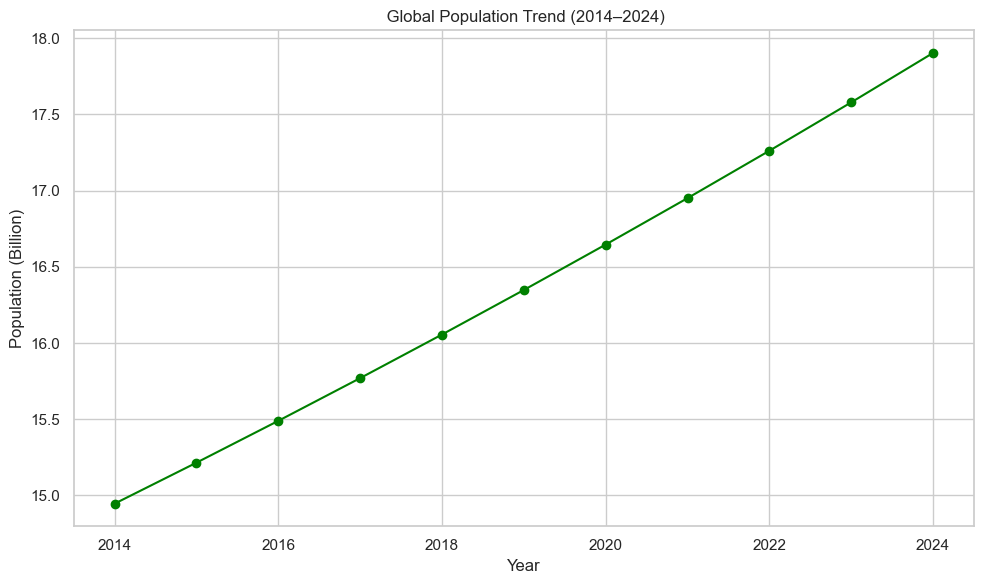

In [10]:
# Aggregate global population per year
global_pop = df_long.groupby("Year")["Population"].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(global_pop["Year"], global_pop["Population"] / 1e9, marker='o', color='green')
plt.title(" Global Population Trend (2014–2024)")
plt.xlabel("Year")
plt.ylabel("Population (Billion)")
plt.tight_layout()
plt.grid(True)
plt.show()

POPULATION INCREASES WITH INCREASE IN YEARS

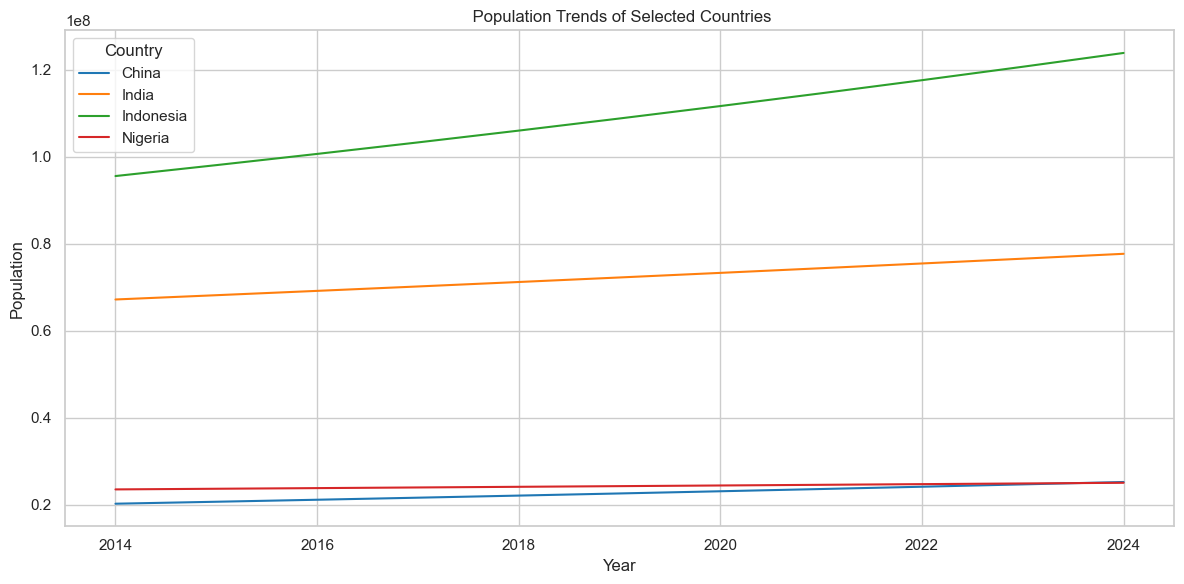

In [12]:
# Country-wise Population Comparison

# Pick a few countries to compare
selected_countries = ['India', 'China', 'United States', 'Indonesia', 'Nigeria']
df_selected = df_long[df_long["Country"].isin(selected_countries)]

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_selected, x="Year", y="Population", hue="Country", palette="tab10")
plt.title(" Population Trends of Selected Countries")
plt.ylabel("Population")
plt.xlabel("Year")
plt.tight_layout()
plt.show()

KEY INSIGHTS:

 Global Growth: The world’s population grew significantly between 2014 and 2024, showing a steady upward trend.

 Country Trends:

India and Indonesia showed strong population growth.

China’s growth is slowing down.

Nigeria also experienced noticeable growth, especially in recent years.



Growth Rates:

Indonesia had the most consistent growth.

India and China maintained steady but slower rates.

Nigeria’s growth remained stable throughout the decade.

India’s Future Population:

Projections suggest India’s population will continue rising and may reach over [X million] by 2030.

 Overall Observation:

All countries analyzed showed positive growth.


In [14]:
#  Population Density Analysis (Assuming Dummy Area Data)

# Dummy area data (sq km) for illustration
area_dict = {
    'India': 3287263,
    'China': 9596961,
    'United States': 9833517,
    'Indonesia': 1904569,
    'Nigeria': 923768
}

In [15]:
# Add density column
latest_year = 2024
latest_df = df_long[df_long["Year"] == latest_year].copy()
latest_df = latest_df[latest_df["Country"].isin(area_dict.keys())]
latest_df["Area_km2"] = latest_df["Country"].map(area_dict)
latest_df["Density"] = latest_df["Population"] / latest_df["Area_km2"]


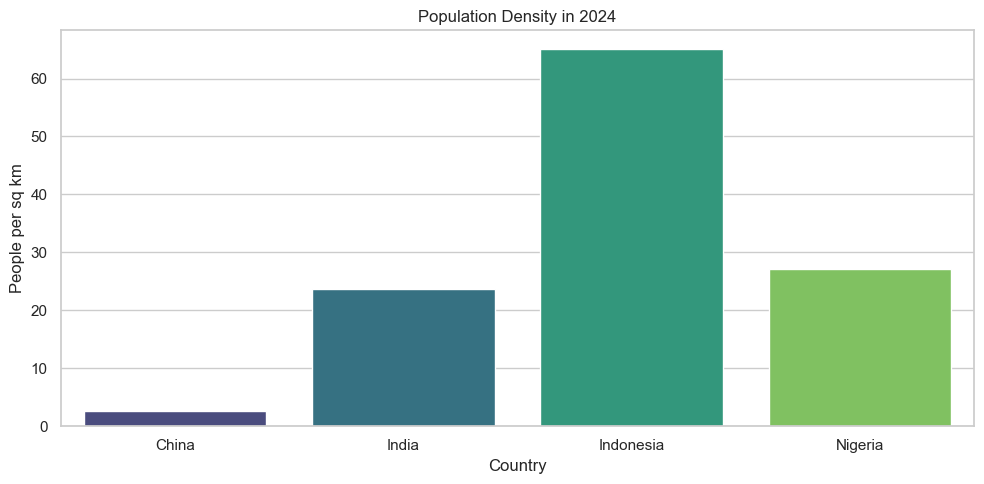

In [17]:

# Bar plot for population density
plt.figure(figsize=(10, 5))
sns.barplot(data=latest_df, x="Country", y="Density", hue="Country", palette="viridis", legend=False)
plt.title(f"Population Density in {latest_year}")
plt.ylabel("People per sq km")
plt.tight_layout()
plt.show()

The notebook analyzes global population trends from 2014 to 2024 using a dataset of 193 countries.
-It covers data cleaning, visualization of global and country-specific population trends, 
-population density analysis (using area data), year-on-year growth rates, and predictive modeling for India's population up to 2030.
-Key visualizations include line plots for trends and growth rates, and bar plots for density.

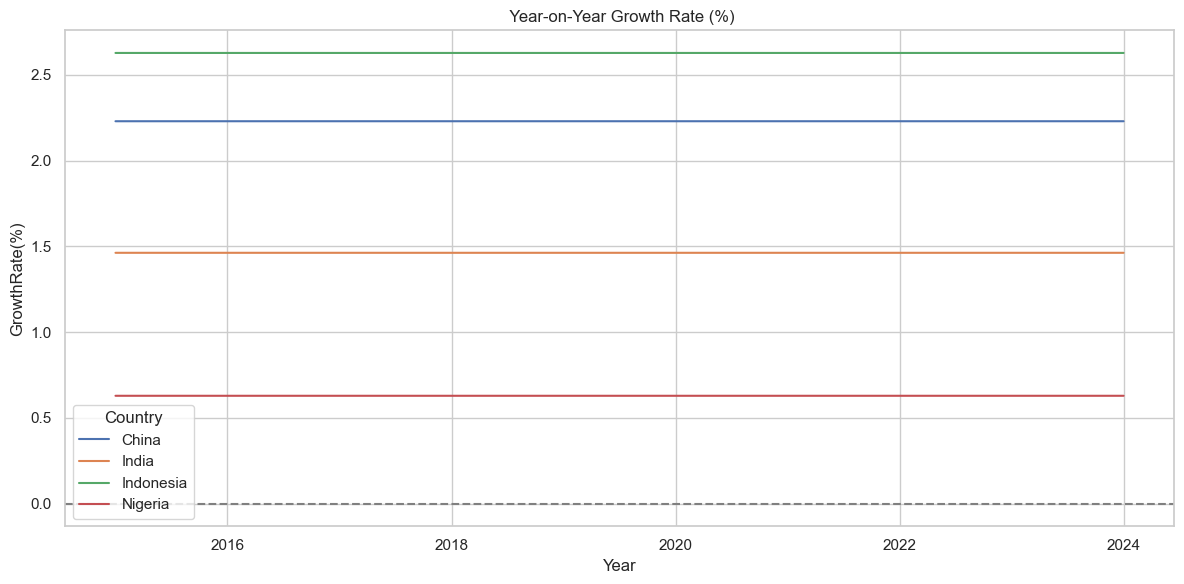

In [21]:
#  Growth Rate Visualization
# Calculate YoY growth rate for each country
df_long["Population_shifted"] = df_long.groupby("Country")["Population"].shift(1)
df_long["GrowthRate(%)"] = ((df_long["Population"] - df_long["Population_shifted"]) /df_long["Population_shifted"]) * 100
growth_df = df_long[df_long["Country"].isin(selected_countries)]

plt.figure(figsize=(12, 6))
sns.lineplot(data=growth_df, x="Year", y="GrowthRate(%)", hue="Country")
plt.title(" Year-on-Year Growth Rate (%)")
plt.axhline(0, color='gray', linestyle='--')
plt.tight_layout()
plt.show()

overview :
The 'Year-on-Year Growth Rate (%)' graph visualizes the annual population growth rates for selected countries (China, India, Indonesia, Nigeria) from 2014 to 2024.

Key observations:
- Each country’s growth rate is plotted as a separate line, allowing for easy comparison.
- Indonesia shows the highest and most consistent growth rate among the selected countries.
- China’s growth rate is steady but lower than Indonesia’s.
- India’s growth rate is moderate and stable.
- Nigeria has the lowest growth rate among the four, but it is also stable.
- The dashed horizontal line at y=0% helps to highlight whether any country experienced negative growth (none did in this period).

This graph helps to quickly compare how population growth rates differ and remain stable or change over time for these major countries.


In [22]:
#  Predictive Modeling

# linear prediction model for INdIA

from sklearn.linear_model import LinearRegression
import numpy as np

india_df = df_long[df_long["Country"] == "India"].copy()
X = india_df["Year"].values.reshape(-1, 1)
y = india_df["Population"].values

model = LinearRegression()
model.fit(X, y)


LinearRegression()

In [23]:
# Predict population for next 5 years
future_years = np.arange(2025, 2031).reshape(-1, 1)
future_pred = model.predict(future_years)


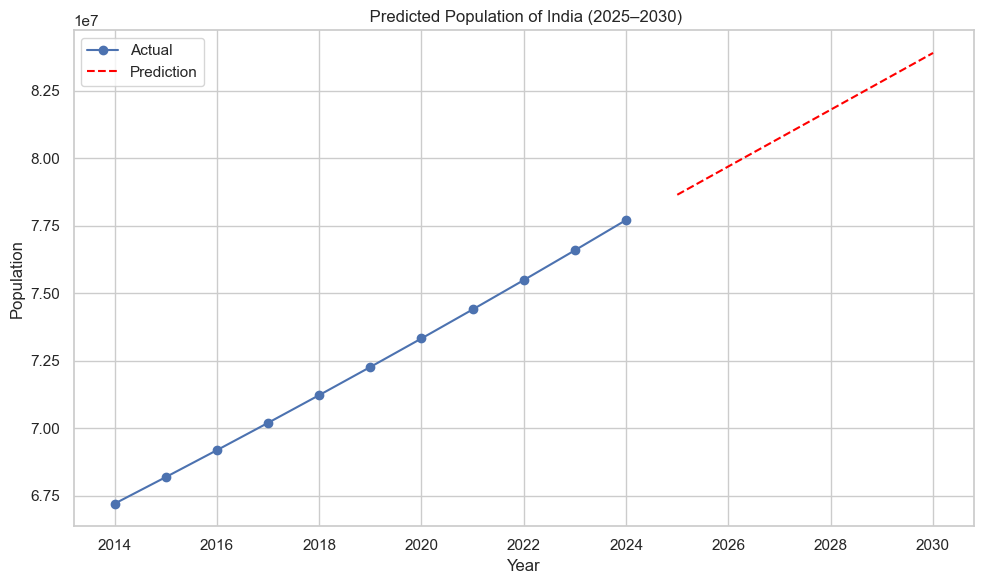

In [25]:
# Plot
plt.figure(figsize=(10, 6))
plt.plot(india_df["Year"], india_df["Population"], label="Actual", marker='o')
plt.plot(future_years.flatten(), future_pred, label="Prediction", linestyle="--", color="red")
plt.title(" Predicted Population of India (2025–2030)")
plt.xlabel("Year")
plt.ylabel("Population")
plt.legend()
plt.tight_layout()
plt.show()

#  Predicted Population of India (2025–2030)

This plot uses linear regression to predict India’s population over the next 5 years.

 Insights:
- A clear upward trend continues, though in reality, population growth may taper off.
- The model is linear; more advanced models (e.g., logistic growth, ARIMA) can improve accuracy.

Good for introducing predictive modeling and time-series concepts.